In [1]:
import pandas as pd 
df = pd.read_csv('heart.csv') 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
from sklearn.model_selection import train_test_split 
y = df['target'] 
X = df.drop(columns=['target'],axis = 1) 

X_train,X_test,Y_train,Y_test = train_test_split(X,y,random_state=0)

Building a vanilla logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(fit_intercept=False,C=1e12,solver = 'liblinear') 
model_log = logreg.fit(X_train,Y_train) 
model_log 

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

function to calculate the precision

In [6]:
def precision(y,y_hat):
    y_y_hat = list(zip(y,y_hat)) 
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1]==1 ]) 
    fp = sum([1 for i in y_y_hat if i[0]==0 and i[1] == 1 ])
    return tp / float(tp+ fp)

function to calculate the recall

In [7]:
def recall(y,y_hat):
    y_y_hat = list(zip(y,y_hat)) 
    tp = sum([1 for i in y_y_hat if i[0]==1 and i[1]==1])
    fn = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 0])
    return tp / float(tp+fn)

function to calculate accuracy

In [8]:
def accuracy(y,y_hat):
    y_y_hat = list(zip(y, y_hat))
    tp = sum([1 for i in y_y_hat if i[0] == 1 and i[1] == 1])
    tn = sum([1 for i in y_y_hat if i[0] == 0 and i[1] == 0])
    return (tp + tn) / float(len(y_hat))


function to calculate F1 score

In [10]:
def f1(y, y_hat):
    precision_score = precision(y, y_hat)
    recall_score = recall(y, y_hat)
    numerator = precision_score * recall_score
    denominator = precision_score + recall_score
    return 2 * (numerator / denominator)

In [11]:
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

print('Training Precision: ', precision(Y_train, y_hat_train))
print('Testing Precision: ', precision(Y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall(Y_train, y_hat_train))
print('Testing Recall: ', recall(Y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy(Y_train, y_hat_train))
print('Testing Accuracy: ', accuracy(Y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1(Y_train, y_hat_train))
print('Testing F1-Score: ', f1(Y_test, y_hat_test))

Training Precision:  0.8396946564885496
Testing Precision:  0.8125



Training Recall:  0.9016393442622951
Testing Recall:  0.9069767441860465



Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8289473684210527



Training F1-Score:  0.8695652173913043
Testing F1-Score:  0.8571428571428572


In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(Y_train, y_hat_train))
print('Testing Precision: ', precision_score(Y_test, y_hat_test))
print('\n\n')

print('Training Recall: ', recall_score(Y_train, y_hat_train))
print('Testing Recall: ', recall_score(Y_test, y_hat_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(Y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(Y_test, y_hat_test))
print('\n\n')

print('Training F1-Score: ', f1_score(Y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(Y_test, y_hat_test))

Training Precision:  0.8396946564885496
Testing Precision:  0.8125



Training Recall:  0.9016393442622951
Testing Recall:  0.9069767441860465



Training Accuracy:  0.8546255506607929
Testing Accuracy:  0.8289473684210527



Training F1-Score:  0.8695652173913043
Testing F1-Score:  0.8571428571428572


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=i/100.0)
    logreg = LogisticRegression(fit_intercept=False, C=1e25, solver='liblinear')
    model_log = logreg.fit(X_train, Y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)

    training_precision.append(precision(Y_train, y_hat_train))
    testing_precision.append(precision(Y_test, y_hat_test))
    training_recall.append(recall(Y_train, y_hat_train))
    testing_recall.append(recall(Y_test, y_hat_test))
    training_accuracy.append(accuracy(Y_train, y_hat_train))
    testing_accuracy.append(accuracy(Y_test, y_hat_test))
    training_f1.append(f1(Y_train, y_hat_train))
    testing_f1.append(f1(Y_test, y_hat_test))
    

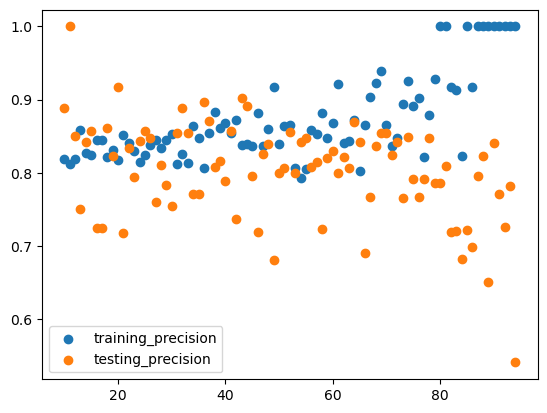

In [15]:
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()

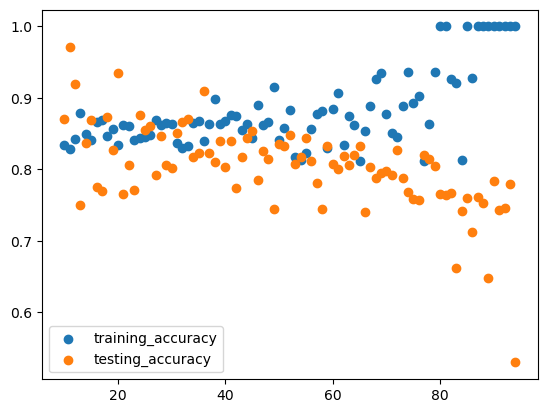

In [16]:
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()

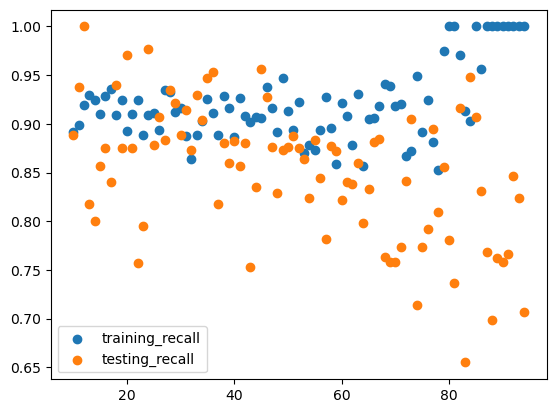

In [17]:
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()

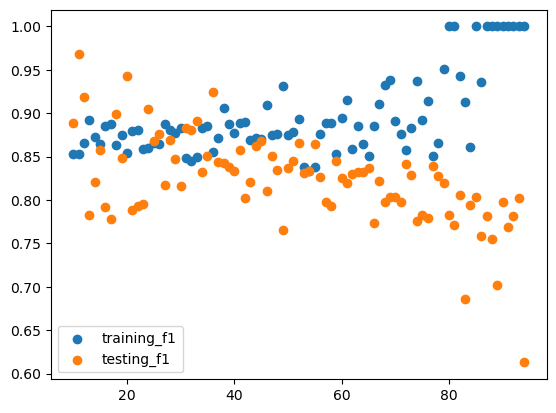

In [18]:
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()